In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

address = 'D:/HomeWork/Machine Learning/ML-HW01/ML-HW01/dataset1/dataset1.csv'

df = pd.read_csv(address)
data = df.sample(frac=1)

In [2]:
#create new data for multivariate gradient descent
data['x0']=data['x']**0
data['x2']=data['x']**2
data['x3']=data['x']**3
data['x4']=data['x']**4
data['x5']=data['x']**5
data['x6']=data['x']**6
data['x7']=data['x']**7
data['x8']=data['x']**8
data['x9']=data['x']**9
data['x10']=data['x']**10

#change columns for better access
newY = data.pop('y')
x0 = data.pop('x0')

data.insert(0, 'y', newY)
data.insert(1, 'x0', x0)

#insert data in arrays
y = data.iloc[:, 0].values
X = data.iloc[:, 1:12].values

mainX = data.iloc[:,2].values

data.head(5)

,y,x0,x,x2,x3,x4,x5,x6,x7,x8,x9,x10
166,2.099942,1.0,-0.976572,0.953693,-0.931349,0.909529,-0.888221,0.867411,-0.847090,0.827244,-8.078630e-01,7.889363e-01
158,-0.841126,1.0,-0.185633,0.034460,-0.006397,0.001187,-0.000220,0.000041,-0.000008,0.000001,-2.617611e-07,4.859161e-08
23,-0.445023,1.0,0.561058,0.314786,0.176614,0.099091,0.055596,0.031192,0.017501,0.009819,5.508994e-03,3.090867e-03
99,2.138097,1.0,-0.990609,0.981306,-0.972091,0.962962,-0.953919,0.944961,-0.936087,0.927296,-9.185877e-01,9.099613e-01
14,1.828887,1.0,-0.857928,0.736040,-0.631469,0.541755,-0.464787,0.398754,-0.342102,0.293499,-2.518008e-01,2.160269e-01


In [3]:
def cost_function_MSE(X, Y, theta):
 m = len(Y)
 J = np.sum((X.dot(theta)-Y) ** 2)/(2*m)
 return np.sqrt(J)

In [4]:
def gradient_descent(X, Y , Theta , alpha , iterations , xTest , yTest  ):
    cost_history = [0] * iterations
    test_cost_history = [0] * iterations
    step_history = [0] * iterations
 
    for iteration in range(iterations):
 # Hypothesis Values
        h = X.dot(Theta)
    
 # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        
    
 # Gradient Calculation
        mse_gradient = X.T.dot(loss) / m
    
        rmse_gradient = np.sqrt((loss.dot(loss))/2*m)
        
        gradient = mse_gradient / rmse_gradient
    
     
    
    
#  Changing Values of B using Gradient
        Theta = Theta - alpha * gradient
        alpha = alpha - 0.000001
    
 # New Cost Value
        cost = cost_function_MSE(X, Y, Theta)
        cost_history[iteration] = cost
        test_cost_history[iteration] = cost_function_MSE(xTest, yTest, Theta)
        step_history[iteration] = alpha * gradient
 
    return Theta, cost_history , test_cost_history , step_history

In [5]:
#60% of data for train
#40% of data for test
m = 180

X_train = X[:m]
mainX_train = X[:m , 1]
y_train = y[:m]

X_test = X[m: , 1]
xTest = X[m:]
y_test = y[m:]

In [6]:
# Initial Coefficients
Theta = np.zeros(X_train.shape[1])

alpha = 0.9
iter_ = 10000

newTheta, cost_history , test_cost_history , step_history = gradient_descent(X_train, y_train, Theta, alpha, iter_ , xTest , y_test )

print(newTheta)

[ 0.12403536  0.66900398  0.72579811 -2.39967951  0.29602206 -0.82977233
  0.11594768  0.26852856  0.00615346  0.87398011 -0.06470121]


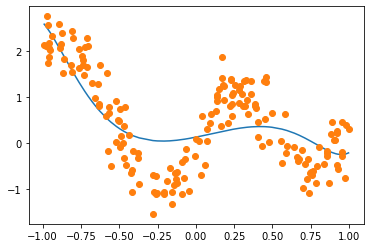

In [7]:
# plot
sorted_X_train = np.sort(mainX_train)
# sorted_X_train = mainX_train
y_predict = [None] * len(sorted_X_train)

for i in range(len(sorted_X_train)):
    y_predict[i] = newTheta[0]+ newTheta[1]*sorted_X_train[i] + newTheta[2]*(sorted_X_train[i]**2) + newTheta[3]*(sorted_X_train[i]**3) + newTheta[4]*(sorted_X_train[i]**4) + newTheta[5]*(sorted_X_train[i]**5)+ newTheta[6]*(sorted_X_train[i]**6) + newTheta[7]*(sorted_X_train[i]**7) + newTheta[8]*(sorted_X_train[i]**8)+ newTheta[9]*(sorted_X_train[i]**9) + newTheta[10]*(sorted_X_train[i]**10)


plt.plot(sorted_X_train,y_predict)
plt.plot(mainX_train,y_train , linestyle='', marker='o')

plt.show()

In [8]:
#test
def pred(testData , Thetas):
    y_predict = [None] * len(testData)
    for i in range(len(testData)):
        y_predict[i] = Thetas[0]+ Thetas[1]*testData[i] + Thetas[2]*(testData[i]**2) + Thetas[3]*(testData[i]**3) + Thetas[4]*(testData[i]**4) + Thetas[5]*(testData[i]**5)+ Thetas[6]*(testData[i]**6) + Thetas[7]*(testData[i]**7) + Thetas[8]*(testData[i]**8)+ Thetas[9]*(testData[i]**9) + Thetas[10]*(testData[i]**10)
    
    return (y_predict)

In [9]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(abs(r2))

In [10]:
y_ = pred(X_test,newTheta)

In [11]:
r2(y_,y_test)

0.5930938758846538

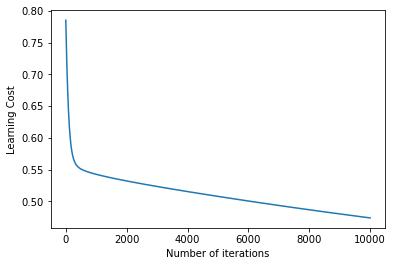

In [12]:
# Plot the convergence graph for learning cost
plt.plot(np.arange(iter_), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Learning Cost')
plt.show()

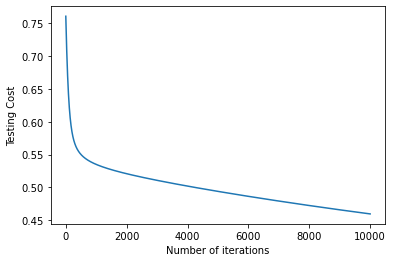

In [13]:
# Plot the convergence graph for testing cost
plt.plot(np.arange(iter_), test_cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Testing Cost')
plt.show()

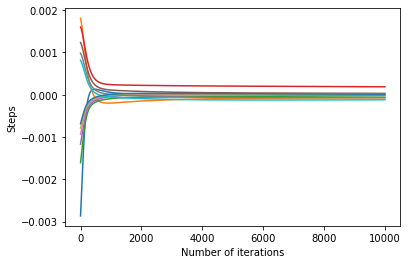

In [14]:
# Plot the convergence graph for thetas Step
plt.plot(np.arange(iter_), step_history)
plt.xlabel('Number of iterations')
plt.ylabel('Steps')
plt.show()